### Understanding the types of missing values 

**1. Missing Completely at Random (MCAR)**

Data is missing entirely by chance and the cause is not related to any other observed or unobserved variable.

For example when a digital weighing scale is out of battries then there will
be missed data which is completely at random.

If data is MCAR, the analysis remains unbiased, although it may lose some statistical power due to reduced sample size.

**2. Missing at Random (MAR)**

MAR data occurs when the probability of data being missing depends only on the observed data and not on the missing data itself. In other words, the missingness can be explained by variables for which you have complete information

For example Older survey respondents are less likely to answer a question about technology use, but within each age group, the missingness is random.

If the missingness can be explained by other observed variables, techniques like multiple imputation can be used to handle the missing data effectively.

**3. Missing Not at Random (MNAR)**

The missingness is related to the unobserved data itself or unmeasured factors. In other words, the reason for the missing data is related to the missing value.

Example: People with lower incomes are less likely to report their income, making the missingness dependent on the income variable itself.

MNAR is the most challenging type of missing data to handle because the missingness mechanism needs to be modeled explicitly, often requiring additional assumptions or data collection.

### Finding out the missing values in a dataset

**We will use a dataset from kaggle to know about missing values and how to handle them**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("nfl_data.csv",dtype=object)

**We will count the number of null values using the isna() method that returns true if the value is not present and count those values using the sum() method**

In [3]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [4]:
df.shape

(362447, 102)

**As we saw that there are lots of values missing in the dataset, we must figure out a way to handle this for future data processing**

### Handling Missing values

#### Method 1: Deletion

This involves removing rows or columns with missing values.

It can be problematic if a significant portion of the data is missing. 

Discarding too much data can affect the reliability of your conclusions.

**we can remove the null values using the `dropna()` method**

**Syntasx `dataframe.dropna(axis, how, thresh, subset, inplace)`**

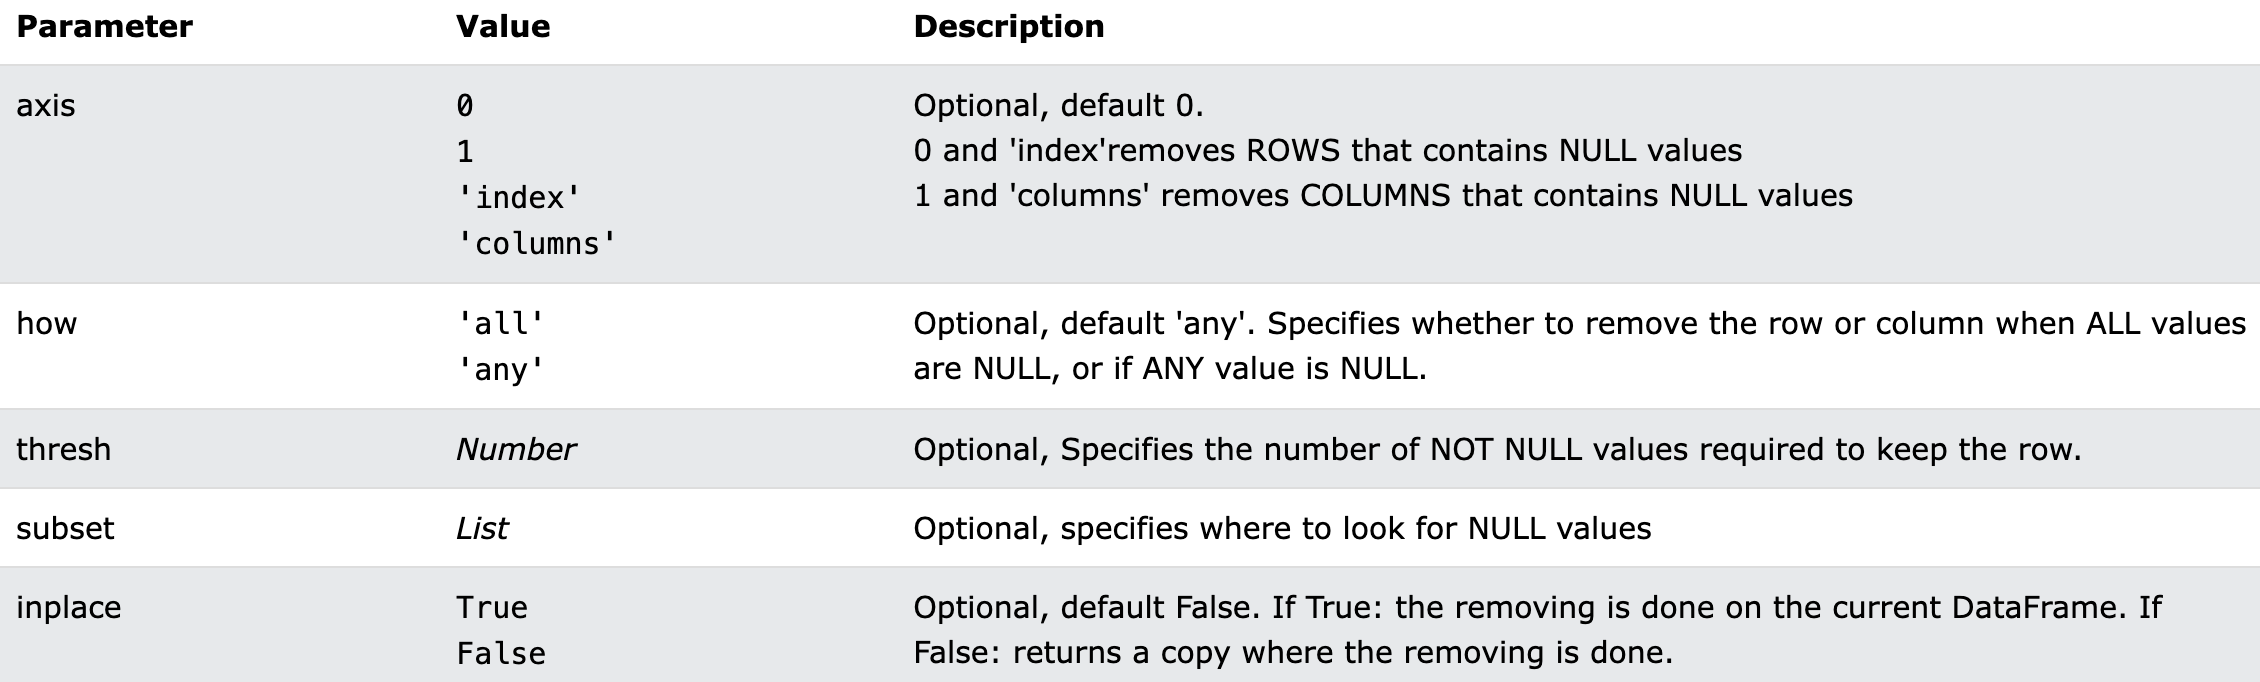

In [5]:
print(df.shape)
df_removed_na_rows = df.dropna()
df_removed_na_rows.shape

(362447, 102)


(0, 102)

**As we can see dropping rows with at least one null value resulted in removing all the data from our dataset, which is not what we wanted so we try other approached**

In [6]:
df_removed_na_columns = df.dropna(axis =1)
df_removed_na_columns.shape

(362447, 37)

**This method removed some values but the lost was significant, we can see how much data we lost by looking at the lost percentage**

In [7]:
prev_colum = df.shape[1]
after_dropping_columns = df_removed_na_columns.shape[1]
lost_percent = after_dropping_columns/prev_colum * 100 
print("{:.2f}".format(lost_percent) + " % data lost")

36.27 % data lost


#### Method 2: Data Impudation

**Impudation means filling in the missing values, here the method can be either** 

1. Pattern based filling
   
2. Estimation based filling

##### **Pattern based Impudation**

There are many ways we can fill in missing values by looking at the pattern of the data. Some methods are:

1. Filling with constant value using `fillna(x)` where x is a constant usually 0
2. Forward filling - Fills the null value with its previous existing value using `ffill()`
3. Backward filling - Fills the null value with its later existing value using `bfill()`

        

**Examples**

`fillna()`

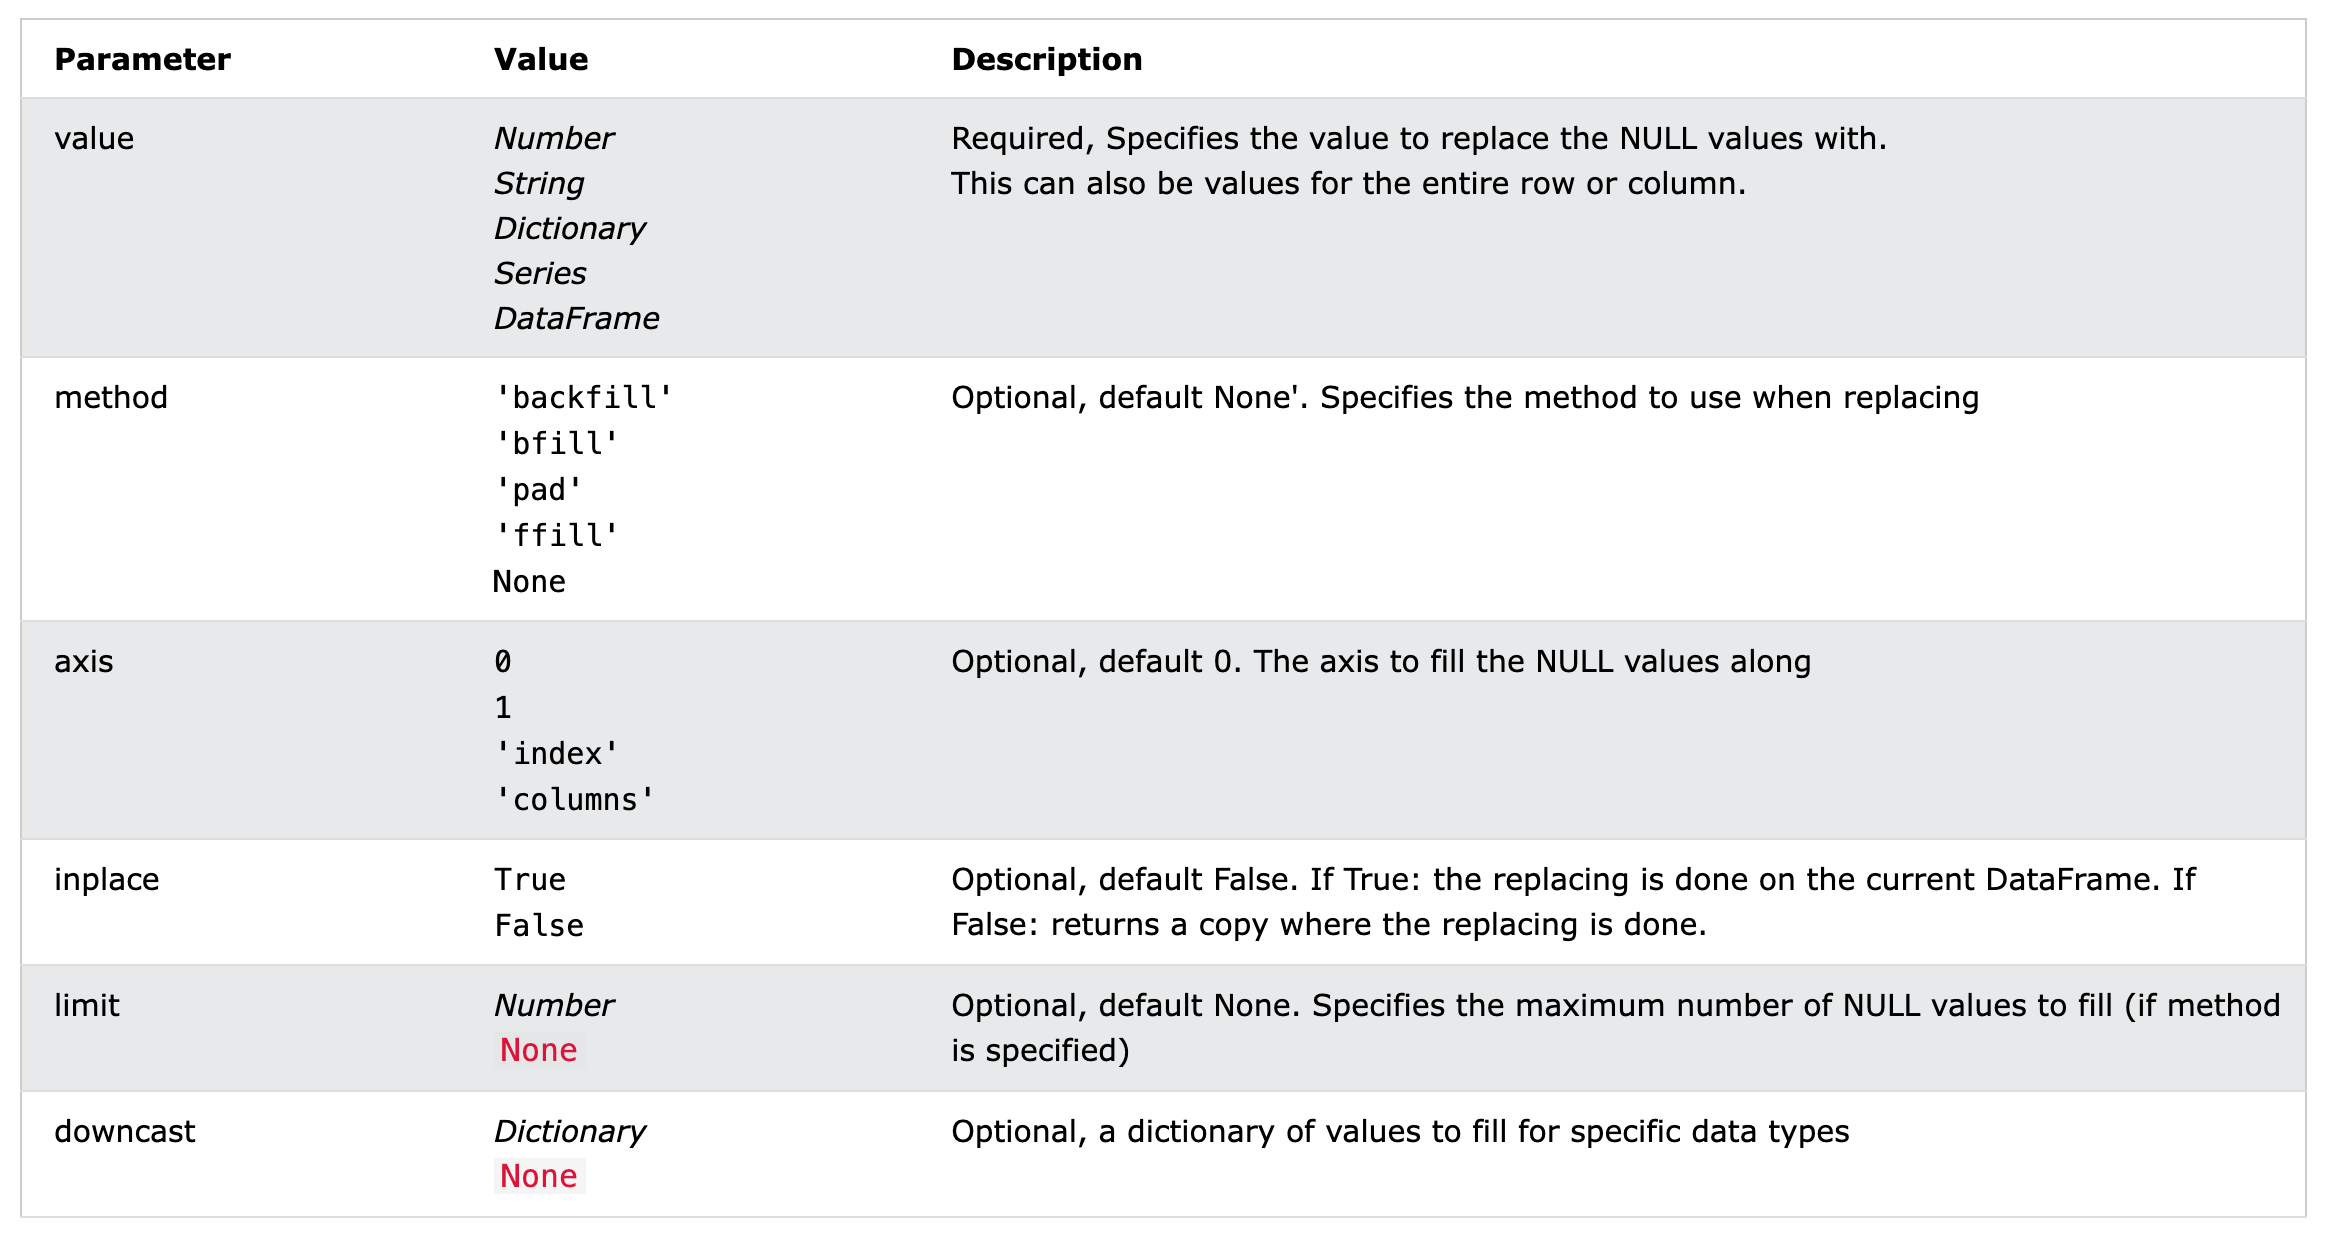

In [8]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [9]:
df_1 = df.fillna(0)

In [10]:
df_1.isna().sum()

Date        0
GameID      0
Drive       0
qtr         0
down        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 102, dtype: int64

`ffill()`

In [11]:
df_2 = df.ffill()

In [12]:
df_2.isna().sum()

Date        0
GameID      0
Drive       0
qtr         0
down        1
           ..
Win_Prob    0
WPA         0
airWPA      1
yacWPA      1
Season      0
Length: 102, dtype: int64

In [13]:
df_3 = df.bfill()

In [14]:
df_3.isna().sum()

Date        0
GameID      0
Drive       0
qtr         0
down        1
           ..
Win_Prob    0
WPA         0
airWPA      4
yacWPA      4
Season      0
Length: 102, dtype: int64

As we saw, `bfill` and `ffill` can **sometimes not replace** the null values, this can be because of the following scenarios:

1. ffill cannot fill null values at the beginning of a series or dataframe because there is no preceding value to carry forward.

2. bfill cannot fill null values at the end of a series or dataframe because there is no subsequent value to carry backward.

3. If a large block of consecutive null values appears at the beginning or end of a series, ffill or bfill alone won't be able to fill them completely.

To Ensure that the dataframe has no null values using ffill and bfill,we can
**combine both methods to gurantee that there is no null values present**

In [15]:
df_4 = df.ffill().bfill()

In [16]:
df_4.isna().sum()

Date        0
GameID      0
Drive       0
qtr         0
down        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 102, dtype: int64

##### **Estimation based Impudation**

Estimation based impudation fills in the missing values by calculating the **central tendency values** such as the

`mean`<br>

`median`<br> 

`mode`<br>

and replaces those values in the missing fields using the `fillna(x)` and replace x with the central tendency values

**When to use mean median of mode for filling in the missing data?**

We can generate graph for the data to visualize the distribution of data and use the filling method accordingly. <br>
Graphs such as 
1. Histogram
2. Boxplot
3. Bar-plot (for cateforical data)
<br>

are used to figure out the distribution of data 

###### **1. Histogram**

Shows the frequency distribution of a numeric variable, helping you see the shape of the data (e.g., normal, skewed, bimodal).

`Normal Distribution`: The histogram is bell-shaped and symmetric around the mean. We **use mean** for imputation.

`Skewed Distribution`: The histogram has a long tail on one side. If it skews right (tail on the right), we **use median** for imputation. If it skews left, also prefer median.

`Bimodal or Multimodal Distribution`: The histogram has two or more peaks. This might suggest the presence of subgroups.
we **use mode (or consider more sophisticated methods like separate imputation for different modes)**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [19]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600,0,TEN,...,NaN,0.4856749860969135,0.5143250139030865,0.5464328397122977,0.4535671602877023,0.4856749860969135,0.060757853615384216,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1,14:53,15,3593,7,PIT,...,1.1460758055888012,0.5464328397122977,0.4535671602877023,0.5510878171614882,0.44891218283851175,0.5464328397122977,0.004654977449190523,-0.03224398696619424,0.03689896441538476,2009
2,2009-09-10,2009091000,1,1,2,14:16,15,3556,37,PIT,...,NaN,0.5510878171614882,0.44891218283851175,0.5107930906986009,0.4892069093013991,0.5510878171614882,-0.04029472646288734,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3,13:35,14,3515,41,PIT,...,-5.031424582246548,0.5107930906986009,0.4892069093013991,0.4612171140114365,0.5387828859885635,0.5107930906986009,-0.0495759766871644,0.10666255529932689,-0.1562385319864913,2009
4,2009-09-10,2009091000,1,1,4,13:27,14,3507,8,PIT,...,NaN,0.4612171140114365,0.5387828859885635,0.5589294012224711,0.44107059877752886,0.4612171140114365,0.09771228721103464,NaN,NaN,2009


In [20]:
df_down = list(df.down)
len(df_down)

362447

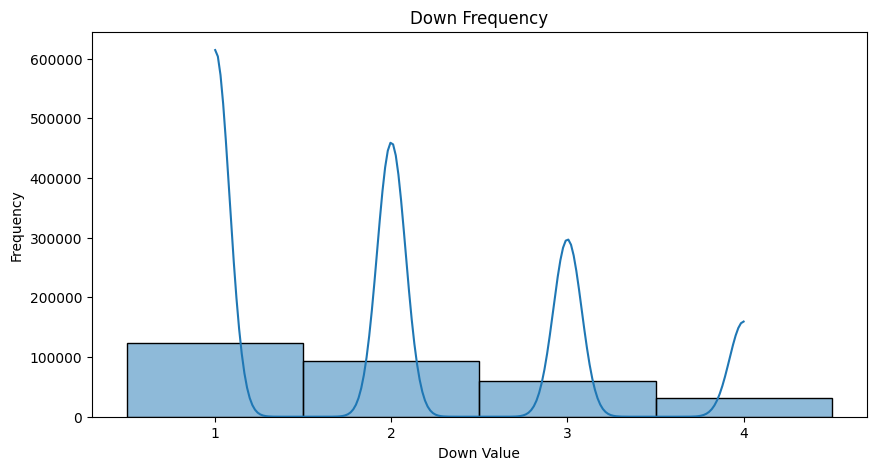

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df_down, kde=True)  # kde=True adds a Kernel Density Estimate line
plt.title('Down Frequency')
plt.xlabel('Down Value')
plt.ylabel('Frequency')
plt.show()

Since the Data is **Scwed Right**, as well as **multimodla**, so we can **use median values** to impute the missing values

In [22]:
df['down'] = pd.to_numeric(df['down'], errors='coerce')

In [23]:
df['down'] = df['down'].fillna(df['down'].median())

In [24]:
df['down'].isna().sum()

0

In [25]:
df_down = list(df['down'])

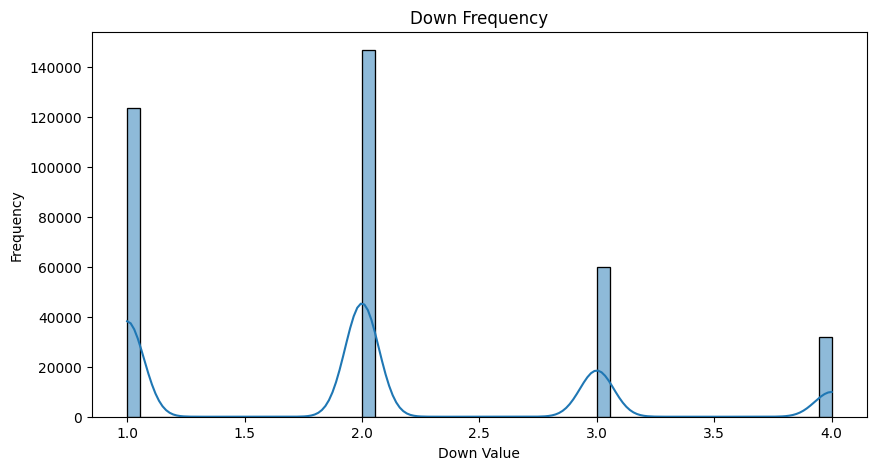

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df_down, kde=True)  # kde=True adds a Kernel Density Estimate line
plt.title('Down Frequency')
plt.xlabel('Down Value')
plt.ylabel('Frequency')
plt.show()

This graph shows a more defined and clear distribution with distinct peaks, which is generally better suited for machine learning.

###### **2. Boxplot**

A boxplot provides a visual summary of the distribution, including the median, quartiles, and potential outliers.

Reading the Boxplot:

`Median Line`: The line inside the box represents the median.

`Box`: The box shows the interquartile range (IQR), which contains the middle 50% of the data.

`Whiskers`: Extend to the smallest and largest data points within 1.5 times the IQR.

`Outliers`: Points outside the whiskers are potential outliers. If outliers are present, 

**prefer using the median to avoid the influence of outliers.**

In [5]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [6]:
df['Win_Prob'].describe()

count                 340454
unique                321220
top       0.4856749860969135
freq                    2550
Name: Win_Prob, dtype: object

**NOTE: Do not forget to change the data to numeric, else it will be difficult to process**

In [7]:
df['Win_Prob'].isna().sum()

21993

In [8]:
df['Win_Prob'] = pd.to_numeric(df['Win_Prob'], errors='coerce')

In [9]:
df['Win_Prob'].isna().sum()

21993

In [10]:
data = list(df['Win_Prob'])
len(data)

362447

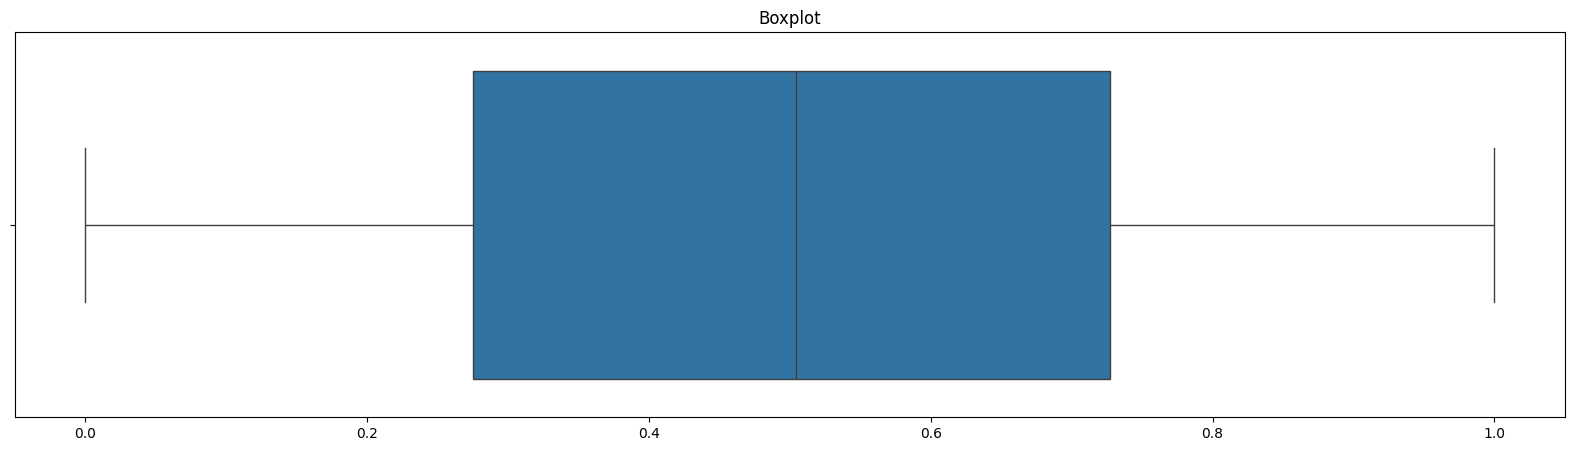

In [11]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=data)
plt.title('Boxplot')
plt.show()

As we can see, the box plot shows that **there are no outliers**, so using mean is the best

In [12]:
df['Win_Prob'] = df['Win_Prob'].fillna(df['Win_Prob'].mean())
df['Win_Prob'].isna().sum()

0

In [13]:
data = list(df['Win_Prob'])
len(data)

362447

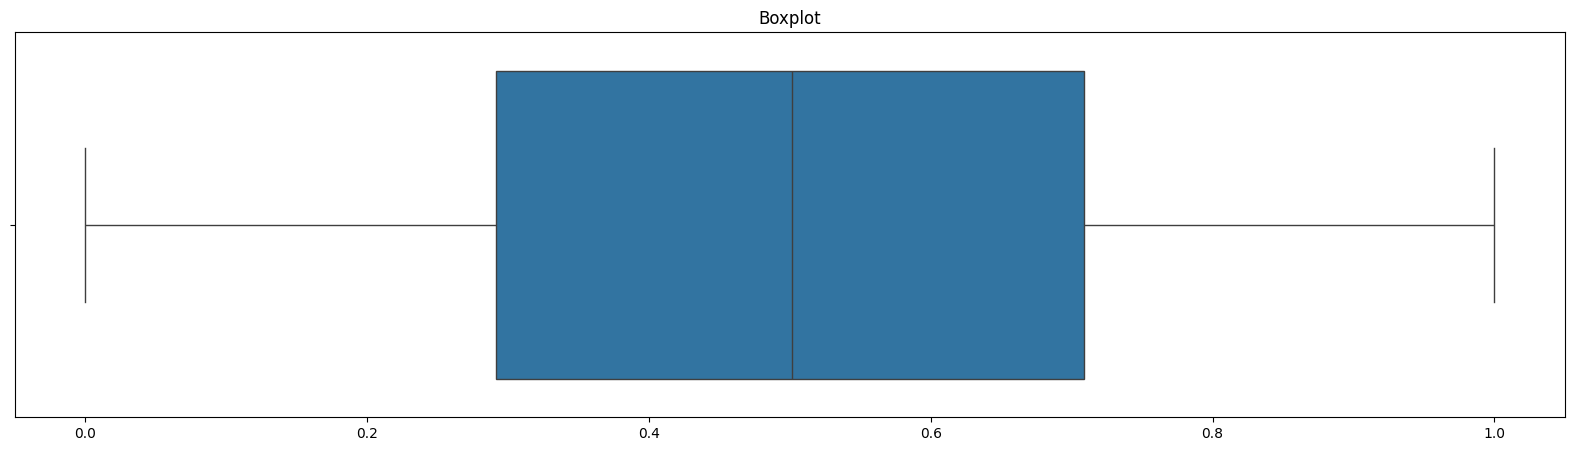

In [14]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=data)
plt.title('Boxplot')
plt.show()

###### **3. Bar Plot**

A bar plot shows the frequency of `categories`, helping identify the mode.<br>
The tallest bar represents the mode of the categorical data. We use `mode` to fill missing values.

I want to see all the values that are missing so i set the `display.max_rows` to `None`

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.isna().sum()

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            54218
time                              188
TimeUnder                           0
TimeSecs                          188
PlayTimeDiff                      374
SideofField                       450
yrdln                             723
yrdline100                        723
ydstogo                             0
ydsnet                              0
GoalToGo                          723
FirstDown                       25597
posteam                         21979
DefensiveTeam                   21979
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  353399
TwoPointConv                   361919
DefTwoPoint                    362433
Safety      

In [6]:
df['PassLocation'].head(10)

0      NaN
1     left
2      NaN
3    right
4      NaN
5      NaN
6     left
7      NaN
8      NaN
9    right
Name: PassLocation, dtype: object


**We have found our categorical variable to learn about Bar graphs and when to use them**

We use the most frequent values to replace the missing categorical values, hence we use `mode`

In [7]:
df['PassLocation'].isna().sum()

213772

In [8]:
df['PassLocation'] = df['PassLocation'].astype('string')
data = list(df['PassLocation'])

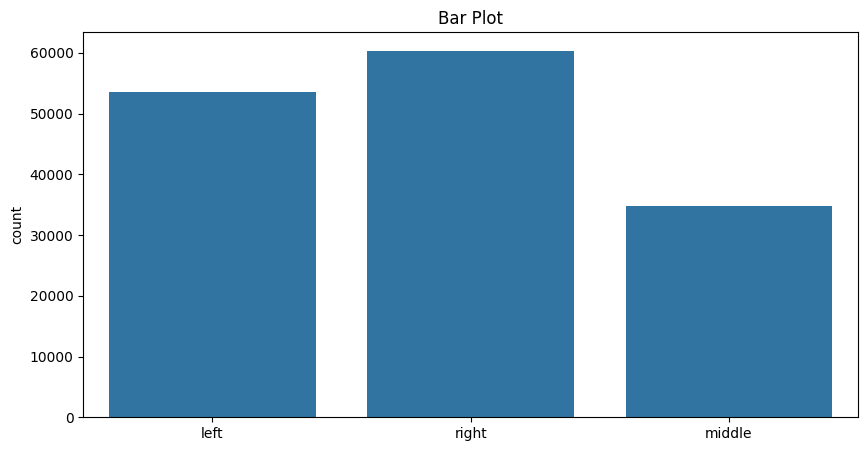

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data)
plt.title('Bar Plot')
plt.show()

In [10]:
mode_value = df['PassLocation'].mode()[0]

Here, I am using mode()[0] because there can be two or more most frequent values that is returned by tge mode() method.

**Eventhough, the graph above clearly shows that 'right' is the most frequent valu, it's a good practice.**

We will be creating a test_df which is a copy of df, we are using the method `.copy()` because if we do `test_df = df` it will just be pointing to df and change the content of df when we change test_df which is not what we want.

In [11]:
test_df = df.copy()
test_df['PassLocation'] = test_df['PassLocation'].astype('string')
data = list(df['PassLocation'])
test_df['PassLocation'] = test_df['PassLocation'].fillna(mode_value)

In [12]:
test_df['PassLocation'].isna().sum()

0

In [13]:
data = list(test_df['PassLocation'])

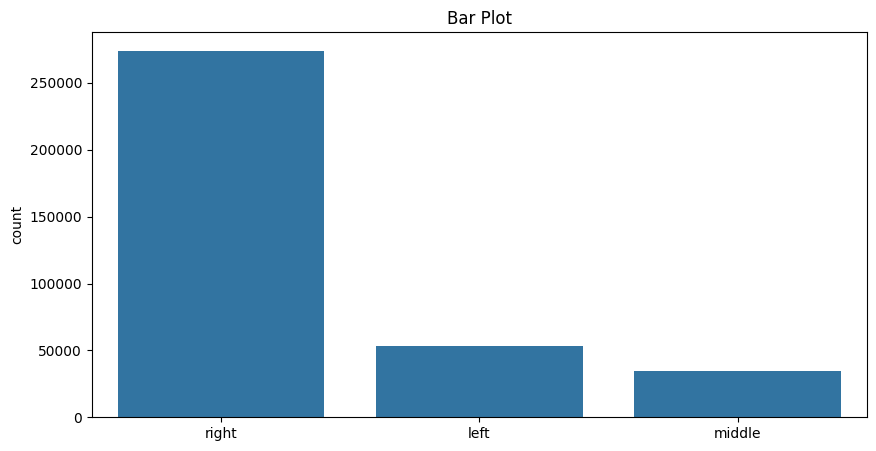

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data)
plt.title('Bar Plot')
plt.show()

This did serve the purpose of filling the missing values but **we can clearly see bias**, this could have been better for fewer missing data but we had 213772 missing data.

Furthermore, the graph before the data was filled was better. So to fix this we either *using a trained model to predict the values* to fill or **use proprotional based filling**, which is what we will be doing here.

In [15]:
category_proportions = df['PassLocation'].value_counts(normalize=True)
print("Category Proportions:\n", category_proportions)

Category Proportions:
 PassLocation
right     0.406080
left      0.360410
middle    0.233509
Name: proportion, dtype: float64




**We could create a function that fills in the values but doing that can be computationally intensive as we have a lot of values missing `213772` to be exact.**

**A better approach would be to generate numbers and fill at once, which is what we will be doiing in a `3 step process`** 


In [21]:
import numpy as np

In [22]:
# Identify missing values
missing_mask = df['PassLocation'].isnull()
num_missing = missing_mask.sum()

In [23]:
# Generate random categories based on the proportions only once
imputed_values = np.random.choice(
    category_proportions.index, 
    size=num_missing, 
    p=category_proportions.values
)

In [25]:
len(imputed_values)

213772

In [26]:
# Assign these imputed values back to the missing places
df.loc[missing_mask, 'PassLocation'] = imputed_values

In [27]:
df['PassLocation'].isna().sum()

0

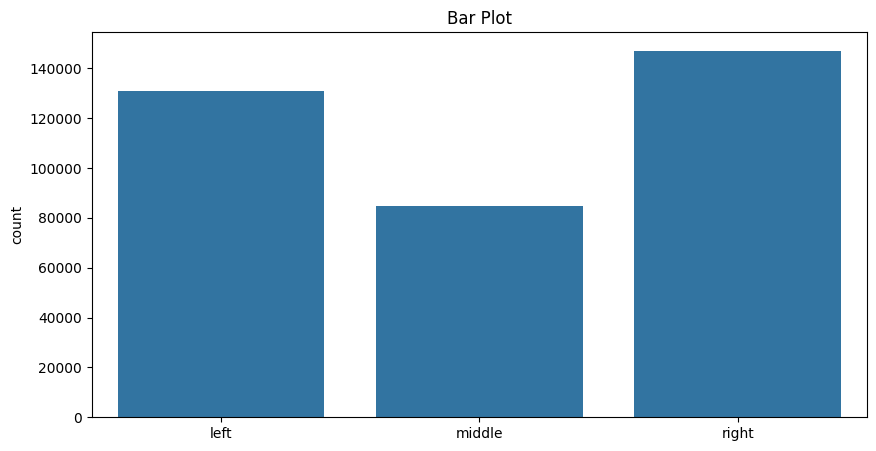

In [28]:
data = list(df['PassLocation'])

plt.figure(figsize=(10, 5))
sns.countplot(x=data)
plt.title('Bar Plot')
plt.show()

**This is way better than what we had earlier**

#### Method 3: Prediction Using Machine Learning

**In this method we use the already available data (cleaned and filtered with reelavent data) and train a model to predict values:**

`Regression Model:` If the value to be predictive is **numeric**

`Classification Model:` If the value to be predicted is **categorical**

**We will just be learning the theoretical aspect of Machine Learning**

**The process can be broken down into 6 general steps as**

**Step 1: Data Preparation**

`Cleaned Data:` Start with cleaned data. This involves handling outliers, scaling numeric features, encoding categorical variables, and removing irrelevant features.

`Feature Selection:` Carefully choose the features that will be used to predict the missing values. These should be features that are strongly correlated with the target variable (the variable with missing values).

`Handling Other Missing Data:` Address other missing data in the dataset. You can impute these with simpler methods (mean, mode, median) or by removing them if they are not critical.

**Step 2: Data Splitting**

`Separate Data into Training and Testing Sets:` Before training the model, split the dataset into training and testing sets. This ensures that you can evaluate the performance of the model on unseen data.

For example, you might use 80% of the data for training and 20% for testing.

**Step 3: Model Selection and Training**

`Model Selection:` Choose an appropriate machine learning model for the task.
For numeric imputation, models like Linear Regression, Random Forest Regressor, or Gradient Boosting Machines.

For categorical imputation, models like Logistic Regression, Random Forest Classifier, or other classification algorithms.

`Training:` Train the model using the training data.

**Step 4: Visualization and Model Evaluation**

`Visualization:` Visualize the model's performance using various plots.

`Learning Curves:` Plot learning curves to visualize the model’s performance on both the training and validation data as the training progresses. This helps in identifying overfitting or underfitting.

`Feature Importance:` Visualize feature importance to understand which features are most influential in predicting the missing values.

`Residual Plots:` For numeric predictions, residual plots can help identify patterns that the model might have missed.

**Step 5: Prediction and Overfitting/Underfitting Considerations**

`Prediction:` Use the trained model to predict the missing values.

Apply the model to the data where the target variable is missing.
Integrate these predictions back into the original dataset.

`Overfitting and Underfitting:`

1. **Overfitting** occurs when the model performs very well on the training data but poorly on the testing data. This suggests that the model is too complex and has learned the noise in the training data.

    **Solutions:** Use regularization techniques (like L1 or L2 regularization), simplify the model by reducing the number of features or the depth of trees in decision tree models, or use cross-validation to tune hyperparameters.

2. **Underfitting** occurs when the model performs poorly on both training and testing data, indicating that it is too simple to capture the underlying patterns.

    **Solutions:** Increase the model complexity, add more features, or choose a more sophisticated model.

**Step 6: Final Imputation and Integration**

Once satisfied with the model’s performance, apply it to the entire dataset (including the data with missing values) to predict the missing entries.

Impute the missing values with the model’s predictions and integrate these back into your dataset.